# Setup Libraries

Needed in google colab

In [1]:
pip install yfinance

     |████████████████████████████████| 63 kB 968 kB/s 
     |████████████████████████████████| 6.4 MB 8.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
#import matplotlib.mlab as mlab 
%matplotlib inline

# statistical calculation
#from scipy.stats import norm

import datetime as dt # For defining dates

import time

import yfinance as yf

# Get Stock Data

In [3]:
all_stocks = ["^GSPC", "^FTLC", "^RUT", "IEUS", "GOVT", "IGOV", "SIVR", "SGOL"]

In [4]:
def get_all_closes_of_stocks(tickers):
  i = 0
  stock_list = pd.DataFrame()
  for ticker in tickers:
    stock = yf.Ticker(ticker)        
    data = stock.history(start="2012-02-24",end ="2022-02-25")
    data.drop(data.columns[[0,1,2,4,5,6]], axis=1, inplace=True) # Just gets the adjacent close for each asset
    data.columns = [ticker]
    stock_list[ticker] = data.iloc[:,0]
  return stock_list.dropna()
stock_data = get_all_closes_of_stocks(all_stocks)
print(stock_data)

                  ^GSPC        ^FTLC         ^RUT       IEUS       GOVT  \
Date                                                                      
2012-02-24  1365.739990  3144.399902   826.919983  27.285175  21.551916   
2012-02-27  1367.589966  3133.399902   826.659973  27.201172  21.551916   
2012-02-28  1372.180054  3141.199951   823.799988  27.445538  21.551916   
2012-02-29  1365.680054  3112.399902   810.940002  27.155352  21.551916   
2012-03-01  1374.089966  3142.899902   815.219971  27.117172  21.551916   
...                 ...          ...          ...        ...        ...   
2022-02-17  4380.259766  4240.200195  2028.089966  63.590000  25.511517   
2022-02-18  4348.870117  4222.799805  2009.329956  62.840000  25.571404   
2022-02-22  4304.759766  4201.799805  1980.170044  61.560001  25.581383   
2022-02-23  4225.500000  4198.799805  1944.089966  60.889999  25.461611   
2022-02-24  4288.700195  4042.899902  1996.010010  60.000000  25.471592   

                 IGOV   

# Backtesting

## Benchmark on the Test Year Only

Note to self for now you multiply column by column. If indecies don't match you won't multiply

In [5]:
portfolio_weights = pd.Series([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125], index=all_stocks) # Defining an equally weighted portfolio
initial_investment = 10000 # 10'000 dollar invesment. Can Change to 100'000 later 
trading_year = 252 # Number of trading days in a year
stock_returns = stock_data.pct_change() 

In [6]:
weighted_portfolio = portfolio_weights * initial_investment # Calculate the dollars invested in each asset in the portfolio
num_of_shares = weighted_portfolio / stock_data.iloc[(-trading_year),:] # Calculate the number of shares owned of each asset in the portfolio
portfolio_test_values = num_of_shares * stock_data.iloc[(-trading_year):,:] # share * share price = position value and it is done for each day in the trading year for all assets
portfolio_test_values['Total'] = portfolio_test_values.sum(axis=1)
portfolio_test_values

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL,Total
Date,,,,,,,,,
2021-02-04,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,10000.000000
2021-02-05,1254.871869,1250.536441,1267.543292,1263.075736,1248.146077,1255.790325,1274.057428,1262.325992,10076.347160
2021-02-08,1264.157103,1256.135191,1299.570524,1269.906401,1248.609536,1257.179921,1296.641830,1274.651984,10166.852490
2021-02-09,1262.749433,1257.677317,1304.814750,1275.761203,1249.536363,1264.823100,1290.259310,1278.277218,10183.898694
2021-02-10,1262.313550,1255.263494,1295.415964,1269.906401,1251.854012,1263.201830,1280.930926,1283.352741,10162.238919
...,...,...,...,...,...,...,...,...,...
2022-02-17,1414.176758,1421.550287,1151.057722,1273.875883,1196.243044,1126.281228,1127.258440,1321.055652,10031.499013
2022-02-18,1404.042539,1415.716711,1140.410337,1258.851399,1199.051161,1124.886221,1131.186260,1319.605641,9993.750269
2022-02-22,1389.801412,1408.676346,1123.860409,1233.209638,1199.519091,1123.723686,1141.987484,1322.505801,9943.283868


### Plot the portfolio

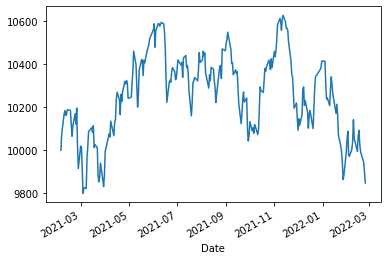

In [9]:
portfolio_test_values['Total'].plot() # Need to pretty this up for the dssertation

### Plot the Individual Assets

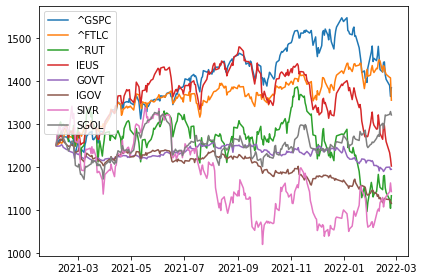

In [ ]:
# Plotted on the same graph to see general trend
figure = plt.figure()
axis = plt.plot(portfolio_test_values.iloc[:,0:1], label='^GSPC')
axis = plt.plot(portfolio_test_values.iloc[:,1:2], label='^FTLC')
axis = plt.plot(portfolio_test_values.iloc[:,2:3], label='^RUT')
axis = plt.plot(portfolio_test_values.iloc[:,3:4], label='IEUS')

axis = plt.plot(portfolio_test_values.iloc[:,4:5], label='GOVT')
axis = plt.plot(portfolio_test_values.iloc[:,5:6], label='IGOV')
axis = plt.plot(portfolio_test_values.iloc[:,6:7], label='SIVR')
axis = plt.plot(portfolio_test_values.iloc[:,7:8], label='SGOL')
plt.tight_layout()
plt.legend()
plt.show()

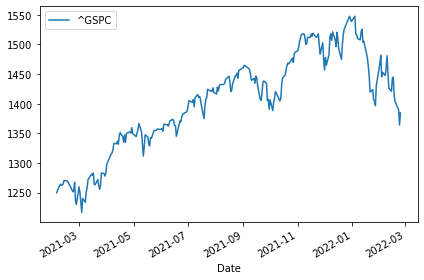

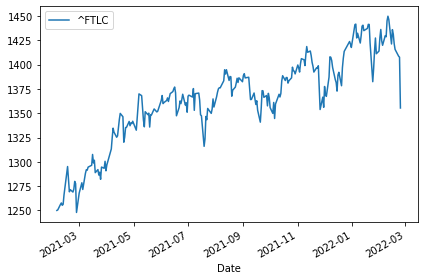

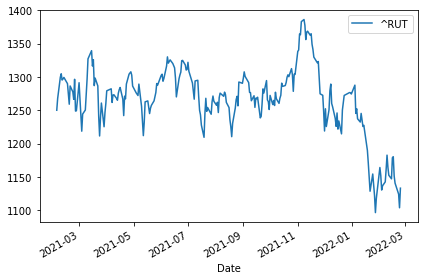

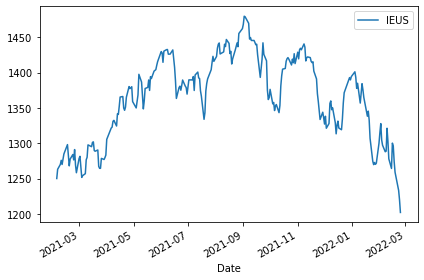

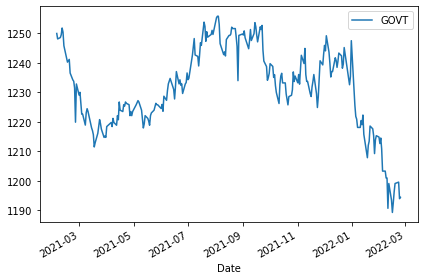

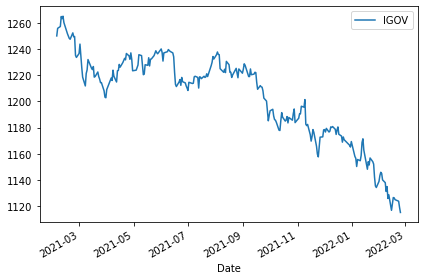

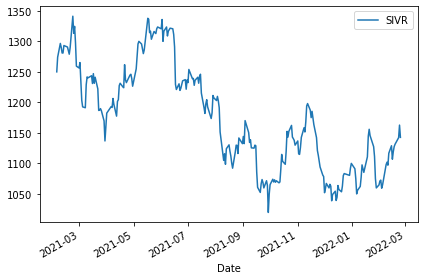

In [11]:
for i in range(1,8):
  portfolio_test_values.iloc[:,(i-1):i].plot()
  plt.tight_layout()
  plt.show()

# Analyse the Test Year

## Sharpe Ratio

^GSPC   -0.007181
^FTLC   -0.002429
^RUT    -0.022670
IEUS    -0.009140
GOVT     0.001513
IGOV    -0.000392
SIVR    -0.022643
SGOL    -0.005838
Name: 2021-12-09 00:00:00, dtype: float64
-14.654064037799433


^GSPC    0.706807
^FTLC    0.615981
^RUT    -0.354477
IEUS    -0.224445
GOVT    -1.019084
IGOV    -1.798319
SIVR    -0.312793
SGOL     0.411152
Total   -0.212969
dtype: float64

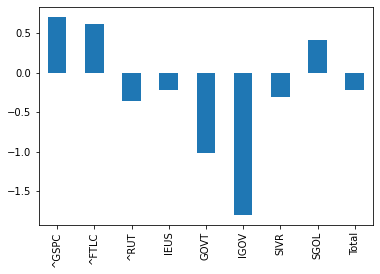

In [ ]:
#daily_stock_returns = portfolio_position_values.pct_change().dropna() # Analysing holding such portfolio position from the start
daily_stock_returns = portfolio_test_values.pct_change().dropna()

# To calculate sharpie ratio for individual stocks 
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 252 #252 trading days in a year
rf =0.01 #1% risk free rate Will need to update this to the US treasury field or something
#The risk-free rate could be a U.S. Treasury rate or yield, such as the one-year or two-year Treasury yield.
sharpes = daily_stock_returns.apply(sharpe_ratio, args=(N,rf,),axis=0)
total_stock_returns = daily_stock_returns.iloc[201,:-1]
sharpes2 = sharpe_ratio(total_stock_returns, N, rf)
print(total_stock_returns)
print(sharpes2)
sharpes.plot.bar()
sharpes

## Volatility

### Individual Stock Volatility

#### Rolling Volatilty for Each stock

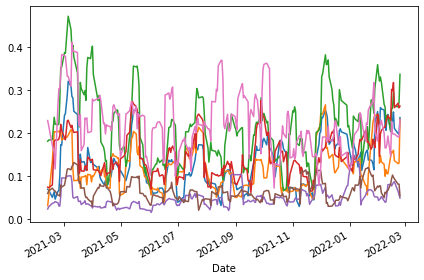

In [ ]:
#data = portfolio_position_values.pct_change().dropna() # Analysing holding such portfolio position from the start
rolling_stock = pd.DataFrame()
data = portfolio_test_values.pct_change().dropna()
for stock in all_stocks:
  rolling_stock[stock] = data[stock].rolling(7).std()*(252**0.5)
f1 = plt.figure()
for i in range(0,7):
  rolling_stock.iloc[:,i].plot()
  plt.tight_layout()
  #plt.show() # To display in separate graphs instead of 1

#### Anualised volatility for Each Stock

In [ ]:
#data = portfolio_position_values.pct_change().dropna() # Analysing holding such portfolio position from the start
stock_volatility = pd.DataFrame()
data = portfolio_test_values.pct_change().dropna()
tmp = pd.DataFrame()
i = 0 
for stock in all_stocks:
  tmp[stock] = data.iloc[:,i:(i+1)]
  stock_volatility = tmp.std()*(252**0.5)
  i = i + 1
print(stock_volatility)

^GSPC    0.148120
^FTLC    0.129242
^RUT     0.232140
IEUS     0.162255
GOVT     0.053289
IGOV     0.067846
SIVR     0.233496
SGOL     0.133648
dtype: float64


### Portfolio Volatility

#### Just the Anualised Volatility for the Portfolio

In [ ]:
total_portfolio_change = portfolio_test_values['Total'].pct_change().dropna()
portfolio_vol = total_portfolio_change.std()*(252**0.5)
portfolio_vol

0.09725466478232812

## Maximum Drawdown

^GSPC   -0.118501
^FTLC   -0.065139
^RUT    -0.209376
IEUS    -0.187752
GOVT    -0.053062
IGOV    -0.118520
SIVR    -0.240117
SGOL    -0.097056
Total   -0.074016
dtype: float64

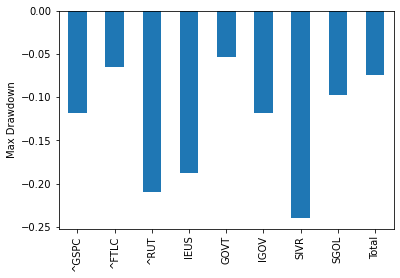

In [ ]:
def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()

daily_stock_returns = portfolio_test_values.pct_change().dropna()
max_drawdowns = daily_stock_returns.apply(max_drawdown,axis=0)
max_drawdowns.plot.bar()
plt.ylabel('Max Drawdown')
max_drawdowns

## Compound Annual Growth Rate (CARG)

In [ ]:
start_value = portfolio_test_values.iloc[0,:]
end_value = portfolio_test_values.iloc[-1,:]
number_of_years =  round(len(portfolio_test_values)/252)
CARG = (((end_value / start_value) ** (1/number_of_years)) -1)# Shows % of values
CARG

^GSPC    0.120845
^FTLC    0.083713
^RUT    -0.072245
IEUS    -0.035119
GOVT    -0.047681
IGOV    -0.113488
SIVR    -0.088166
SGOL     0.032295
Total   -0.014981
dtype: float64

## Calmar Ratio

^GSPC    1.071736
^FTLC    1.383885
^RUT    -0.233904
IEUS    -0.122640
GOVT    -0.908299
IGOV    -1.012722
SIVR    -0.275645
SGOL     0.425731
Total   -0.142670
dtype: float64

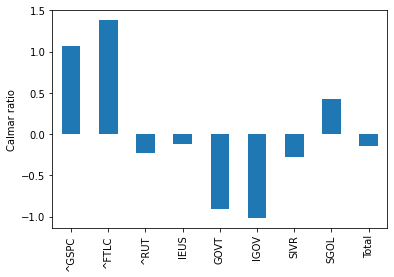

In [ ]:
#daily_stock_returns = portfolio_position_values.pct_change().dropna() # Analysing holding such portfolio position from the start
daily_stock_returns = portfolio_test_values.pct_change().dropna()

calmars = daily_stock_returns.mean()*255/abs(max_drawdowns)

calmars.plot.bar()
plt.ylabel('Calmar ratio')
calmars

## Value at Risk? Haven't decided if I want to include this or not

# Export the Benchmark for the Test Year to a CSV

In [13]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [14]:
portfolio_test_values.to_csv('EqualAllocationBenchmark.csv')

In [18]:
!cp EqualAllocationBenchmark.csv "drive/My Drive/DisData"